### Cài đặt và khai báo thư viện

In [ ]:
pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install webdriver_manager

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached urllib3-1.25.11-py2.py3-none-any.whl (127 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.12
    Uninstalling urllib3-1.26.12:
      Successfully uninstalled urllib3-1.26.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.5.0 requires urllib3[socks]~=1.26, but you have urllib3 1.25.11 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from re import S
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from time import sleep

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

<html lang="en-US"><head>
    <title>Just a moment...</title>
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge">
    <meta name="robots" content="noindex,nofollow">
    <meta name="viewport" content="width=device-width,initial-scale=1">
    <link href="/cdn-cgi/styles/challenges.css" rel="stylesheet">
    

<script src="/cdn-cgi/challenge-platform/h/b/orchestrate/managed/v1?ray=75d983a2a99eade3"></script><script src="https://cloudflare.hcaptcha.com/1/api.js?endpoint=https%3A%2F%2Fcloudflare.hcaptcha.com&amp;assethost=https%3A%2F%2Fcf-assets.hcaptcha.com&amp;imghost=https%3A%2F%2Fcf-imgs.hcaptcha.com&amp;render=explicit&amp;recaptchacompat=off&amp;onload=_cf_chl_hload"></script></head>
<body class="no-js">
    <div class="main-wrapper" role="main">
    <div class="main-content">
        <h1 class="zone-name-title h1">
            <img class="heading-favicon" src="/favicon.ico" onerror="this.onerror=null;this.
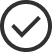

In [ ]:
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
driver = webdriver.Chrome('chromedriver',options=options)
driver.get("https://www.website.com")
print(driver.page_source)  # results

### Cào và xử lý

In [ ]:
stock = input('Nhập mã chứng khoán ')
stock

Nhập mã chứng khoán NLG


'NLG'

In [ ]:
driver.get('https://cafef.vn/')
driver.maximize_window()    
sleep(5)

#Tìm đến ô nhập mã chứng khoán
input_stock = driver.find_element(By.XPATH, "/html/body/form/div[2]/div[5]/div/div[1]/div[2]/div[1]/div/div[1]/input[1]")
#Nhập mã chứng khoán đã khai báo đã chọn ở trên
input_stock.send_keys(stock)
sleep(2)
#Nhấn nút Enter sau khi nhập mã chững khoán
input_stock.send_keys(Keys.ENTER)
sleep(5)
#Tìm Tài sản sau đó nhấn "Xem đầy đủ" để hiển thị kết quả chi tiết
view_data = driver.find_element(By.XPATH, "/html/body/form/div[3]/div[2]/div/div[2]/div[2]/div[1]/div/div[11]/div[2]/div[1]/div/div[2]/table/tbody/tr[13]/td[2]/a")
view_data.click()
sleep(2)

In [ ]:
html = driver.page_source
soup = BeautifulSoup(html,'lxml')

In [ ]:
r_names = []
t =  soup.findAll("td",class_ = "h_t")
for i in range(len(t)):
  r_n =  t[i].text.strip(' \t\n\r')
  r_names.insert(0,r_n)
r_names.reverse()
r_names

['Quý 3-2021', 'Quý 4-2021', 'Quý 1-2022', 'Quý 2-2022']

In [ ]:
table = soup.find("table",id="tableContent")
table

<table cellpadding="0" cellspacing="0" id="tableContent" style="border-top: solid 1px #e6e6e6;border-left:solid 1px #cccccc;border-bottom:solid 1px #cccccc" width="100%">
<tbody><tr class="r_item " id="100">
<td class="b_r_c" style="width:32%;color:#333333;font-weight:bold;font-size:13px">
                    
                I - TÀI SẢN NGẮN HẠN
            </td>
<td align="right" class="b_r_c" style="width:15%;padding:4px;color:#333333;font-weight:bold;font-size:13px">22,149,193,033,026</td>
<td align="right" class="b_r_c" style="width:15%;padding:4px;color:#333333;font-weight:bold;font-size:13px">21,615,997,865,149</td>
<td align="right" class="b_r_c" style="width:15%;padding:4px;color:#333333;font-weight:bold;font-size:13px">21,490,661,569,271</td>
<td align="right" class="b_r_c" style="width:15%;padding:4px;color:#333333;font-weight:bold;font-size:13px">22,927,069,427,033</td>
<td align="right" class="b_r_c"><center><table border="0" cellpadding="0" cellspacing="0" class="BaoCaoTa

In [ ]:
table_data = table.findAll('tr',attrs={'class':['r_item','r_item_a']})
dic = {}
for i in range (len(table_data)):
  key = table_data[i].findAll('td',class_="b_r_c")[0].text
  values =[j.string for j in table_data[i].findAll('td',class_="b_r_c")]
  dic[key] = values
df1=pd.DataFrame(dic).iloc[1:5]
df1.index = r_names
df1

,\n \n I - TÀI SẢN NGẮN HẠN\n,\n\n 1. Tiền và các khoản tương đương tiền\n,\n \n 1.1.Tiền\n,\n \n 1.2.Các khoản tương đương tiền\n,\n\n 2. Các khoản đầu tư tài chính ngắn hạn \n,\n \n 2.1. Chứng khoán kinh doanh\n,\n \n 2.2. Dự phòng giảm giá chứng khoán kinh doanh\n,\n \n 2.3. Đầu tư nắm giữ đến ngày đáo hạn\n,\n\n 3. Các khoản phải thu ngắn hạn\n,\n \n 3.1.Phải thu khách hàng\n,...,\n \n - LNST chưa phân phối lũy kế đến cuối kỳ trước\n,\n \n - LNST chưa phân phối kỳ này\n,\n \n 12. Nguồn vốn đầu tư XDCB\n,\n \n 13. Lợi ích cổ đông không kiểm soát\n,\n \n 14. Phụ trội hợp nhất công ty con\n,\n\n 2. Nguồn kinh phí và các quỹ khác\n,\n \n 2.1. Nguồn kinh phí\n,\n \n 2.2. Nguồn kinh phí đã hình thành TSCĐ\n,\n \n III - LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ\n,\n \n Tổng cộng nguồn vốn\n
Quý 3-2021,"22,149,193,033,026","895,870,832,225","542,849,282,869","353,021,549,356","1,358,322,590,171",None,None,"1,358,322,590,171","1,921,040,124,581","524,670,766,853",...,"709,447,454,916","1,950,901,227,157",None,"4,239,701,590,678",None,None,None,None,None,"24,115,960,662,251"
Quý 4-2021,"21,615,997,865,149","3,111,621,576,852","1,265,161,762,459","1,846,459,814,393","743,668,846,722",None,None,"743,668,846,722","2,019,142,436,152","720,041,081,713",...,"1,070,826,325,922","1,373,267,314,898",None,"4,666,010,813,838",None,None,None,None,None,"23,717,036,862,377"
Quý 1-2022,"21,490,661,569,271","2,884,314,321,749","921,248,052,285","1,963,066,269,464","157,160,704,195",None,None,"157,160,704,195","2,094,013,473,962","744,898,429,377",...,"630,401,146","2,318,986,169,546",None,"4,135,022,835,134",None,None,None,None,None,"23,432,117,814,087"
Quý 2-2022,"22,927,069,427,033","3,715,458,857,947","809,069,574,969","2,906,389,282,978","224,516,406,274",None,None,"224,516,406,274","2,457,477,034,492","895,211,784,679",...,"111,289,420,633","2,052,166,579,400",None,"4,122,729,922,052",None,None,None,None,None,"24,842,132,856,857"


In [ ]:
def clickY():
  lastY = driver.find_element(By.XPATH, "/html/body/form/div[3]/div/div/div/div[2]/div[2]/div[9]/div[1]/table/tbody/tr/td[1]/div/a[1]")
  lastY.click()
  sleep(2)

In [ ]:
def rowName(soup):
  r_names = []
  t =  soup.findAll("td",class_ = "h_t")
  for i in range(len(t)):
    r_n =  t[i].text.strip(' \t\n\r')
    r_names.insert(0,r_n)
  r_names.reverse()
  return r_names

In [ ]:
def crawlData():
  clickY()
  clickY()
  clickY()
  clickY()
  html = driver.page_source
  soup = BeautifulSoup(html,'lxml')
  table = soup.find("table",id="tableContent")
  table_data = table.findAll('tr',attrs={'class':['r_item','r_item_a']})
  dic = {}
  for i in range (len(table_data)):
    key = table_data[i].findAll('td',class_="b_r_c")[0].text
    values =[j.string for j in table_data[i].findAll('td',class_="b_r_c")]
    dic[key] = values
  df1=pd.DataFrame(dic).iloc[1:5]
  df1.index = rowName(soup)
  return df1

In [ ]:
df = pd.concat([crawlData() ,df1])
df

,\n \n I - TÀI SẢN NGẮN HẠN\n,\n\n 1. Tiền và các khoản tương đương tiền\n,\n \n 1.1.Tiền\n,\n \n 1.2.Các khoản tương đương tiền\n,\n\n 2. Các khoản đầu tư tài chính ngắn hạn \n,\n \n 2.1. Chứng khoán kinh doanh\n,\n \n 2.2. Dự phòng giảm giá chứng khoán kinh doanh\n,\n \n 2.3. Đầu tư nắm giữ đến ngày đáo hạn\n,\n\n 3. Các khoản phải thu ngắn hạn\n,\n \n 3.1.Phải thu khách hàng\n,...,\n \n - LNST chưa phân phối lũy kế đến cuối kỳ trước\n,\n \n - LNST chưa phân phối kỳ này\n,\n \n 12. Nguồn vốn đầu tư XDCB\n,\n \n 13. Lợi ích cổ đông không kiểm soát\n,\n \n 14. Phụ trội hợp nhất công ty con\n,\n\n 2. Nguồn kinh phí và các quỹ khác\n,\n \n 2.1. Nguồn kinh phí\n,\n \n 2.2. Nguồn kinh phí đã hình thành TSCĐ\n,\n \n III - LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ\n,\n \n Tổng cộng nguồn vốn\n
Quý 3-2020,"8,280,339,728,454","981,231,263,343","568,669,687,164","412,561,576,179","36,372,379,000",None,None,"36,372,379,000","1,734,143,255,971","589,750,749,140",...,"208,050,169,511","1,663,924,968,995",None,"1,137,606,217,482",None,None,None,None,None,"11,802,756,789,945"
Quý 4-2020,"9,299,797,974,141","1,096,219,425,836","592,888,738,986","503,330,686,850","46,350,356,992",None,None,"46,350,356,992","1,968,581,399,877","579,523,458,533",...,"834,865,877,303","1,298,205,691,229",None,"1,117,288,198,020",None,None,None,None,None,"13,459,854,394,912"
Quý 1-2021,"17,102,032,852,783","1,346,887,027,663","794,221,745,645","552,665,282,018","89,356,902,901",None,None,"89,356,902,901","1,918,161,199,299","590,731,929,179",...,"365,300,219,353","2,132,525,600,087",None,"3,189,411,369,914",None,None,None,None,None,"19,762,445,033,472"
Quý 2-2021,"17,376,483,137,061","1,221,094,516,994","740,479,012,842","480,615,504,152","62,076,912,592",None,None,"62,076,912,592","1,849,815,428,986","603,689,783,198",...,"412,303,865,765","1,950,686,267,230",None,"3,186,112,823,077",None,None,None,None,None,"20,122,606,241,365"
Quý 3-2021,"22,149,193,033,026","895,870,832,225","542,849,282,869","353,021,549,356","1,358,322,590,171",None,None,"1,358,322,590,171","1,921,040,124,581","524,670,766,853",...,"709,447,454,916","1,950,901,227,157",None,"4,239,701,590,678",None,None,None,None,None,"24,115,960,662,251"
Quý 4-2021,"21,615,997,865,149","3,111,621,576,852","1,265,161,762,459","1,846,459,814,393","743,668,846,722",None,None,"743,668,846,722","2,019,142,436,152","720,041,081,713",...,"1,070,826,325,922","1,373,267,314,898",None,"4,666,010,813,838",None,None,None,None,None,"23,717,036,862,377"
Quý 1-2022,"21,490,661,569,271","2,884,314,321,749","921,248,052,285","1,963,066,269,464","157,160,704,195",None,None,"157,160,704,195","2,094,013,473,962","744,898,429,377",...,"630,401,146","2,318,986,169,546",None,"4,135,022,835,134",None,None,None,None,None,"23,432,117,814,087"
Quý 2-2022,"22,927,069,427,033","3,715,458,857,947","809,069,574,969","2,906,389,282,978","224,516,406,274",None,None,"224,516,406,274","2,457,477,034,492","895,211,784,679",...,"111,289,420,633","2,052,166,579,400",None,"4,122,729,922,052",None,None,None,None,None,"24,842,132,856,857"


In [ ]:
df = pd.concat([crawlData() ,df])
df

,\n \n I - TÀI SẢN NGẮN HẠN\n,\n\n 1. Tiền và các khoản tương đương tiền\n,\n \n 1.1.Tiền\n,\n \n 1.2.Các khoản tương đương tiền\n,\n\n 2. Các khoản đầu tư tài chính ngắn hạn \n,\n \n 2.1. Chứng khoán kinh doanh\n,\n \n 2.2. Dự phòng giảm giá chứng khoán kinh doanh\n,\n \n 2.3. Đầu tư nắm giữ đến ngày đáo hạn\n,\n\n 3. Các khoản phải thu ngắn hạn\n,\n \n 3.1.Phải thu khách hàng\n,...,\n \n - LNST chưa phân phối lũy kế đến cuối kỳ trước\n,\n \n - LNST chưa phân phối kỳ này\n,\n \n 12. Nguồn vốn đầu tư XDCB\n,\n \n 13. Lợi ích cổ đông không kiểm soát\n,\n \n 14. Phụ trội hợp nhất công ty con\n,\n\n 2. Nguồn kinh phí và các quỹ khác\n,\n \n 2.1. Nguồn kinh phí\n,\n \n 2.2. Nguồn kinh phí đã hình thành TSCĐ\n,\n \n III - LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ\n,\n \n Tổng cộng nguồn vốn\n
Quý 3-2019,"7,531,448,642,404","1,529,545,504,027","565,395,896,667","964,149,607,360","44,445,568,799",None,None,"44,445,568,799","1,136,470,887,943","366,780,169,591",...,"412,247,889,541","994,546,194,812",None,"1,143,469,833,476",None,None,None,None,None,"10,311,356,658,439"
Quý 4-2019,"7,781,677,177,826","1,894,488,673,379","748,368,802,370","1,146,119,871,009","72,846,344,417",None,None,"72,846,344,417","1,500,130,823,491","472,815,832,157",...,"960,075,400,219","878,669,169,783",None,"1,145,105,732,185",None,None,None,None,None,"10,787,654,796,029"
Quý 1-2020,"7,781,476,399,562","1,424,092,982,471","602,316,666,548","821,776,315,923","55,142,703,967",None,None,"55,142,703,967","1,822,895,049,225","511,805,987,589",...,"110,421,778,909","1,839,301,254,305",None,"1,141,642,554,008",None,None,None,None,None,"10,930,685,784,659"
Quý 2-2020,"8,173,189,019,437","1,390,212,126,572","591,731,645,081","798,480,481,491","27,440,156,992",None,None,"27,440,156,992","1,709,028,109,541","514,175,705,275",...,"178,665,870,914","1,666,612,032,775",None,"1,134,690,150,935",None,None,None,None,None,"11,818,334,700,105"
Quý 3-2020,"8,280,339,728,454","981,231,263,343","568,669,687,164","412,561,576,179","36,372,379,000",None,None,"36,372,379,000","1,734,143,255,971","589,750,749,140",...,"208,050,169,511","1,663,924,968,995",None,"1,137,606,217,482",None,None,None,None,None,"11,802,756,789,945"
Quý 4-2020,"9,299,797,974,141","1,096,219,425,836","592,888,738,986","503,330,686,850","46,350,356,992",None,None,"46,350,356,992","1,968,581,399,877","579,523,458,533",...,"834,865,877,303","1,298,205,691,229",None,"1,117,288,198,020",None,None,None,None,None,"13,459,854,394,912"
Quý 1-2021,"17,102,032,852,783","1,346,887,027,663","794,221,745,645","552,665,282,018","89,356,902,901",None,None,"89,356,902,901","1,918,161,199,299","590,731,929,179",...,"365,300,219,353","2,132,525,600,087",None,"3,189,411,369,914",None,None,None,None,None,"19,762,445,033,472"
Quý 2-2021,"17,376,483,137,061","1,221,094,516,994","740,479,012,842","480,615,504,152","62,076,912,592",None,None,"62,076,912,592","1,849,815,428,986","603,689,783,198",...,"412,303,865,765","1,950,686,267,230",None,"3,186,112,823,077",None,None,None,None,None,"20,122,606,241,365"
Quý 3-2021,"22,149,193,033,026","895,870,832,225","542,849,282,869","353,021,549,356","1,358,322,590,171",None,None,"1,358,322,590,171","1,921,040,124,581","524,670,766,853",...,"709,447,454,916","1,950,901,227,157",None,"4,239,701,590,678",None,None,None,None,None,"24,115,960,662,251"
Quý 4-2021,"21,615,997,865,149","3,111,621,576,852","1,265,161,762,459","1,846,459,814,393","743,668,846,722",None,None,"743,668,846,722","2,019,142,436,152","720,041,081,713",...,"1,070,826,325,922","1,373,267,314,898",None,"4,666,010,813,838",None,None,None,None,None,"23,717,036,862,377"


In [ ]:
df = pd.concat([crawlData() ,df])
df

,\n \n I - TÀI SẢN NGẮN HẠN\n,\n\n 1. Tiền và các khoản tương đương tiền\n,\n \n 1.1.Tiền\n,\n \n 1.2.Các khoản tương đương tiền\n,\n\n 2. Các khoản đầu tư tài chính ngắn hạn \n,\n \n 2.1. Chứng khoán kinh doanh\n,\n \n 2.2. Dự phòng giảm giá chứng khoán kinh doanh\n,\n \n 2.3. Đầu tư nắm giữ đến ngày đáo hạn\n,\n\n 3. Các khoản phải thu ngắn hạn\n,\n \n 3.1.Phải thu khách hàng\n,...,\n \n - LNST chưa phân phối lũy kế đến cuối kỳ trước\n,\n \n - LNST chưa phân phối kỳ này\n,\n \n 12. Nguồn vốn đầu tư XDCB\n,\n \n 13. Lợi ích cổ đông không kiểm soát\n,\n \n 14. Phụ trội hợp nhất công ty con\n,\n\n 2. Nguồn kinh phí và các quỹ khác\n,\n \n 2.1. Nguồn kinh phí\n,\n \n 2.2. Nguồn kinh phí đã hình thành TSCĐ\n,\n \n III - LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ\n,\n \n Tổng cộng nguồn vốn\n
Quý 3-2018,"7,206,981,773,905","2,846,838,896,132","312,670,450,830","2,534,168,445,302","156,624,648,676",None,None,"156,624,648,676","894,005,892,725","252,363,901,552",...,"635,142,874,987","575,121,080,607",None,"737,861,244,489",None,None,None,None,None,"9,346,456,550,291"
Quý 4-2018,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Quý 1-2019,"7,730,795,591,811","1,592,229,487,284","416,714,717,354","1,175,514,769,930","81,304,166,098",None,None,"81,304,166,098","1,035,024,248,040","303,180,764,918",...,"145,241,359,070","1,294,483,274,610",None,"1,022,215,370,775",None,None,None,None,None,"10,222,478,775,095"
Quý 2-2019,"7,759,621,600,728","1,810,233,351,167","977,071,127,199","833,162,223,968","43,515,386,823",None,None,"43,515,386,823","1,274,384,013,618","337,002,497,657",...,"265,754,714,526","1,177,200,128,835",None,"1,149,361,313,514",None,None,None,None,None,"10,303,711,252,768"
Quý 3-2019,"7,531,448,642,404","1,529,545,504,027","565,395,896,667","964,149,607,360","44,445,568,799",None,None,"44,445,568,799","1,136,470,887,943","366,780,169,591",...,"412,247,889,541","994,546,194,812",None,"1,143,469,833,476",None,None,None,None,None,"10,311,356,658,439"
Quý 4-2019,"7,781,677,177,826","1,894,488,673,379","748,368,802,370","1,146,119,871,009","72,846,344,417",None,None,"72,846,344,417","1,500,130,823,491","472,815,832,157",...,"960,075,400,219","878,669,169,783",None,"1,145,105,732,185",None,None,None,None,None,"10,787,654,796,029"
Quý 1-2020,"7,781,476,399,562","1,424,092,982,471","602,316,666,548","821,776,315,923","55,142,703,967",None,None,"55,142,703,967","1,822,895,049,225","511,805,987,589",...,"110,421,778,909","1,839,301,254,305",None,"1,141,642,554,008",None,None,None,None,None,"10,930,685,784,659"
Quý 2-2020,"8,173,189,019,437","1,390,212,126,572","591,731,645,081","798,480,481,491","27,440,156,992",None,None,"27,440,156,992","1,709,028,109,541","514,175,705,275",...,"178,665,870,914","1,666,612,032,775",None,"1,134,690,150,935",None,None,None,None,None,"11,818,334,700,105"
Quý 3-2020,"8,280,339,728,454","981,231,263,343","568,669,687,164","412,561,576,179","36,372,379,000",None,None,"36,372,379,000","1,734,143,255,971","589,750,749,140",...,"208,050,169,511","1,663,924,968,995",None,"1,137,606,217,482",None,None,None,None,None,"11,802,756,789,945"
Quý 4-2020,"9,299,797,974,141","1,096,219,425,836","592,888,738,986","503,330,686,850","46,350,356,992",None,None,"46,350,356,992","1,968,581,399,877","579,523,458,533",...,"834,865,877,303","1,298,205,691,229",None,"1,117,288,198,020",None,None,None,None,None,"13,459,854,394,912"


In [ ]:
df = pd.concat([crawlData() ,df])
df

,\n \n I - TÀI SẢN NGẮN HẠN\n,\n\n 1. Tiền và các khoản tương đương tiền\n,\n \n 1.1.Tiền\n,\n \n 1.2.Các khoản tương đương tiền\n,\n\n 2. Các khoản đầu tư tài chính ngắn hạn \n,\n \n 2.1. Chứng khoán kinh doanh\n,\n \n 2.2. Dự phòng giảm giá chứng khoán kinh doanh\n,\n \n 2.3. Đầu tư nắm giữ đến ngày đáo hạn\n,\n\n 3. Các khoản phải thu ngắn hạn\n,\n \n 3.1.Phải thu khách hàng\n,...,\n \n - LNST chưa phân phối lũy kế đến cuối kỳ trước\n,\n \n - LNST chưa phân phối kỳ này\n,\n \n 12. Nguồn vốn đầu tư XDCB\n,\n \n 13. Lợi ích cổ đông không kiểm soát\n,\n \n 14. Phụ trội hợp nhất công ty con\n,\n\n 2. Nguồn kinh phí và các quỹ khác\n,\n \n 2.1. Nguồn kinh phí\n,\n \n 2.2. Nguồn kinh phí đã hình thành TSCĐ\n,\n \n III - LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ\n,\n \n Tổng cộng nguồn vốn\n
Quý 3-2017,"6,529,846,219,470","1,523,985,342,396","796,608,547,185","727,376,795,211","50,740,000,000",None,None,"50,740,000,000","1,136,168,171,840","192,797,758,891",...,"351,352,942,361","376,396,074,226",None,"822,852,808,441",None,None,None,None,None,"7,787,115,607,637"
Quý 4-2017,"6,696,456,953,560","2,082,081,217,039","533,848,457,083","1,548,232,759,956","60,497,573,374",None,None,"60,497,573,374","577,853,039,172","227,021,799,046",...,"500,682,970,678","363,065,489,892",None,"802,626,704,177",None,None,None,None,None,"7,921,244,099,313"
Quý 1-2018,"6,415,510,147,921","1,808,781,814,379","307,611,204,678","1,501,170,609,701","45,857,924,736",None,None,"45,857,924,736","608,436,904,605","238,168,927,998",...,"31,714,552,484","860,329,260,839",None,"698,759,682,950",None,None,None,None,None,"7,554,341,186,024"
Quý 2-2018,"7,187,072,323,959","2,518,165,088,714","730,269,920,544","1,787,895,168,170","112,974,648,676",None,None,"112,974,648,676","701,813,039,151","308,928,447,201",...,"578,160,254,932","215,081,746,565",None,"708,634,858,972",None,None,None,None,None,"8,328,284,255,074"
Quý 3-2018,"7,206,981,773,905","2,846,838,896,132","312,670,450,830","2,534,168,445,302","156,624,648,676",None,None,"156,624,648,676","894,005,892,725","252,363,901,552",...,"635,142,874,987","575,121,080,607",None,"737,861,244,489",None,None,None,None,None,"9,346,456,550,291"
Quý 4-2018,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Quý 1-2019,"7,730,795,591,811","1,592,229,487,284","416,714,717,354","1,175,514,769,930","81,304,166,098",None,None,"81,304,166,098","1,035,024,248,040","303,180,764,918",...,"145,241,359,070","1,294,483,274,610",None,"1,022,215,370,775",None,None,None,None,None,"10,222,478,775,095"
Quý 2-2019,"7,759,621,600,728","1,810,233,351,167","977,071,127,199","833,162,223,968","43,515,386,823",None,None,"43,515,386,823","1,274,384,013,618","337,002,497,657",...,"265,754,714,526","1,177,200,128,835",None,"1,149,361,313,514",None,None,None,None,None,"10,303,711,252,768"
Quý 3-2019,"7,531,448,642,404","1,529,545,504,027","565,395,896,667","964,149,607,360","44,445,568,799",None,None,"44,445,568,799","1,136,470,887,943","366,780,169,591",...,"412,247,889,541","994,546,194,812",None,"1,143,469,833,476",None,None,None,None,None,"10,311,356,658,439"
Quý 4-2019,"7,781,677,177,826","1,894,488,673,379","748,368,802,370","1,146,119,871,009","72,846,344,417",None,None,"72,846,344,417","1,500,130,823,491","472,815,832,157",...,"960,075,400,219","878,669,169,783",None,"1,145,105,732,185",None,None,None,None,None,"10,787,654,796,029"


In [ ]:
df = pd.concat([crawlData() ,df])
df

,\n \n I - TÀI SẢN NGẮN HẠN\n,\n\n 1. Tiền và các khoản tương đương tiền\n,\n \n 1.1.Tiền\n,\n \n 1.2.Các khoản tương đương tiền\n,\n\n 2. Các khoản đầu tư tài chính ngắn hạn \n,\n \n 2.1. Chứng khoán kinh doanh\n,\n \n 2.2. Dự phòng giảm giá chứng khoán kinh doanh\n,\n \n 2.3. Đầu tư nắm giữ đến ngày đáo hạn\n,\n\n 3. Các khoản phải thu ngắn hạn\n,\n \n 3.1.Phải thu khách hàng\n,...,\n \n - LNST chưa phân phối lũy kế đến cuối kỳ trước\n,\n \n - LNST chưa phân phối kỳ này\n,\n \n 12. Nguồn vốn đầu tư XDCB\n,\n \n 13. Lợi ích cổ đông không kiểm soát\n,\n \n 14. Phụ trội hợp nhất công ty con\n,\n\n 2. Nguồn kinh phí và các quỹ khác\n,\n \n 2.1. Nguồn kinh phí\n,\n \n 2.2. Nguồn kinh phí đã hình thành TSCĐ\n,\n \n III - LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ\n,\n \n Tổng cộng nguồn vốn\n
Quý 3-2016,"5,243,517,675,129","701,316,256,767","433,619,636,487","267,696,620,280","169,000,000,000",None,None,"169,000,000,000","871,641,563,210","200,839,585,724",...,"277,746,420,785","157,750,533,709",None,"486,554,010,302",None,None,None,None,None,"5,560,347,711,119"
Quý 4-2016,"5,828,216,387,403","931,562,883,084","391,805,138,578","539,757,744,506","38,869,085,285",None,None,"38,869,085,285","1,094,934,187,907","340,384,104,224",...,"277,746,420,785","300,656,481,980",None,"663,514,306,406",None,None,None,None,None,"6,208,809,467,667"
Quý 1-2017,"5,987,701,296,461","960,963,162,987","540,005,105,755","420,958,057,232","9,000,000,000",None,None,"9,000,000,000","1,120,135,400,276","254,286,543,577",...,"20,651,348,493","546,728,040,423",None,"782,467,735,645",None,None,None,None,None,"6,344,827,514,861"
Quý 2-2017,"6,471,140,351,474","1,167,165,809,340","287,992,743,676","879,173,065,664","44,615,650,676",None,None,"44,615,650,676","1,687,056,243,106","761,153,080,946",...,"517,933,464,226","309,488,984,238",None,"853,459,516,574",None,None,None,None,None,"7,554,497,645,043"
Quý 3-2017,"6,529,846,219,470","1,523,985,342,396","796,608,547,185","727,376,795,211","50,740,000,000",None,None,"50,740,000,000","1,136,168,171,840","192,797,758,891",...,"351,352,942,361","376,396,074,226",None,"822,852,808,441",None,None,None,None,None,"7,787,115,607,637"
Quý 4-2017,"6,696,456,953,560","2,082,081,217,039","533,848,457,083","1,548,232,759,956","60,497,573,374",None,None,"60,497,573,374","577,853,039,172","227,021,799,046",...,"500,682,970,678","363,065,489,892",None,"802,626,704,177",None,None,None,None,None,"7,921,244,099,313"
Quý 1-2018,"6,415,510,147,921","1,808,781,814,379","307,611,204,678","1,501,170,609,701","45,857,924,736",None,None,"45,857,924,736","608,436,904,605","238,168,927,998",...,"31,714,552,484","860,329,260,839",None,"698,759,682,950",None,None,None,None,None,"7,554,341,186,024"
Quý 2-2018,"7,187,072,323,959","2,518,165,088,714","730,269,920,544","1,787,895,168,170","112,974,648,676",None,None,"112,974,648,676","701,813,039,151","308,928,447,201",...,"578,160,254,932","215,081,746,565",None,"708,634,858,972",None,None,None,None,None,"8,328,284,255,074"
Quý 3-2018,"7,206,981,773,905","2,846,838,896,132","312,670,450,830","2,534,168,445,302","156,624,648,676",None,None,"156,624,648,676","894,005,892,725","252,363,901,552",...,"635,142,874,987","575,121,080,607",None,"737,861,244,489",None,None,None,None,None,"9,346,456,550,291"
Quý 4-2018,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df = pd.concat([crawlData() ,df])
df

,\n \n I - TÀI SẢN NGẮN HẠN\n,\n\n 1. Tiền và các khoản tương đương tiền\n,\n \n 1.1.Tiền\n,\n \n 1.2.Các khoản tương đương tiền\n,\n\n 2. Các khoản đầu tư tài chính ngắn hạn \n,\n \n 2.1. Chứng khoán kinh doanh\n,\n \n 2.2. Dự phòng giảm giá chứng khoán kinh doanh\n,\n \n 2.3. Đầu tư nắm giữ đến ngày đáo hạn\n,\n\n 3. Các khoản phải thu ngắn hạn\n,\n \n 3.1.Phải thu khách hàng\n,...,\n \n - LNST chưa phân phối lũy kế đến cuối kỳ trước\n,\n \n - LNST chưa phân phối kỳ này\n,\n \n 12. Nguồn vốn đầu tư XDCB\n,\n \n 13. Lợi ích cổ đông không kiểm soát\n,\n \n 14. Phụ trội hợp nhất công ty con\n,\n\n 2. Nguồn kinh phí và các quỹ khác\n,\n \n 2.1. Nguồn kinh phí\n,\n \n 2.2. Nguồn kinh phí đã hình thành TSCĐ\n,\n \n III - LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ\n,\n \n Tổng cộng nguồn vốn\n
Quý 3-2015,"3,808,416,281,369","221,839,155,237","146,906,889,062","74,932,266,175",None,None,None,None,"366,559,571,371","140,846,685,527",...,"150,681,403,290","74,625,647,736",None,"111,461,413,607",None,None,None,None,None,"4,445,218,499,174"
Quý 4-2015,"4,703,805,477,813","383,195,907,688","311,195,907,688","72,000,000,000","56,636,025,899",None,None,"56,636,025,899","520,923,573,717","161,835,378,672",...,"173,481,865,767","184,760,942,454",None,"208,548,161,912",None,None,None,None,None,"5,026,458,536,306"
Quý 1-2016,"4,439,683,746,848","184,395,626,315","141,559,600,416","42,836,025,899",None,None,None,None,"574,318,501,399","164,290,894,831",...,"354,669,547,051","33,775,853,294",None,"152,804,898,896",None,None,None,None,None,"4,762,294,584,769"
Quý 2-2016,"5,270,727,710,540","848,582,750,596","405,772,252,196","442,810,498,400","48,920,940,285",None,None,"48,920,940,285","727,715,762,107","213,108,848,714",...,"290,421,671,578","127,385,153,397",None,"425,164,993,612",None,None,None,None,None,"5,596,460,965,155"
Quý 3-2016,"5,243,517,675,129","701,316,256,767","433,619,636,487","267,696,620,280","169,000,000,000",None,None,"169,000,000,000","871,641,563,210","200,839,585,724",...,"277,746,420,785","157,750,533,709",None,"486,554,010,302",None,None,None,None,None,"5,560,347,711,119"
Quý 4-2016,"5,828,216,387,403","931,562,883,084","391,805,138,578","539,757,744,506","38,869,085,285",None,None,"38,869,085,285","1,094,934,187,907","340,384,104,224",...,"277,746,420,785","300,656,481,980",None,"663,514,306,406",None,None,None,None,None,"6,208,809,467,667"
Quý 1-2017,"5,987,701,296,461","960,963,162,987","540,005,105,755","420,958,057,232","9,000,000,000",None,None,"9,000,000,000","1,120,135,400,276","254,286,543,577",...,"20,651,348,493","546,728,040,423",None,"782,467,735,645",None,None,None,None,None,"6,344,827,514,861"
Quý 2-2017,"6,471,140,351,474","1,167,165,809,340","287,992,743,676","879,173,065,664","44,615,650,676",None,None,"44,615,650,676","1,687,056,243,106","761,153,080,946",...,"517,933,464,226","309,488,984,238",None,"853,459,516,574",None,None,None,None,None,"7,554,497,645,043"
Quý 3-2017,"6,529,846,219,470","1,523,985,342,396","796,608,547,185","727,376,795,211","50,740,000,000",None,None,"50,740,000,000","1,136,168,171,840","192,797,758,891",...,"351,352,942,361","376,396,074,226",None,"822,852,808,441",None,None,None,None,None,"7,787,115,607,637"
Quý 4-2017,"6,696,456,953,560","2,082,081,217,039","533,848,457,083","1,548,232,759,956","60,497,573,374",None,None,"60,497,573,374","577,853,039,172","227,021,799,046",...,"500,682,970,678","363,065,489,892",None,"802,626,704,177",None,None,None,None,None,"7,921,244,099,313"


In [ ]:
df = pd.concat([crawlData() ,df])
df

,\n \n I - TÀI SẢN NGẮN HẠN\n,\n\n 1. Tiền và các khoản tương đương tiền\n,\n \n 1.1.Tiền\n,\n \n 1.2.Các khoản tương đương tiền\n,\n\n 2. Các khoản đầu tư tài chính ngắn hạn \n,\n \n 2.1. Chứng khoán kinh doanh\n,\n \n 2.2. Dự phòng giảm giá chứng khoán kinh doanh\n,\n \n 2.3. Đầu tư nắm giữ đến ngày đáo hạn\n,\n\n 3. Các khoản phải thu ngắn hạn\n,\n \n 3.1.Phải thu khách hàng\n,...,\n \n - LNST chưa phân phối lũy kế đến cuối kỳ trước\n,\n \n - LNST chưa phân phối kỳ này\n,\n \n 12. Nguồn vốn đầu tư XDCB\n,\n \n 13. Lợi ích cổ đông không kiểm soát\n,\n \n 14. Phụ trội hợp nhất công ty con\n,\n\n 2. Nguồn kinh phí và các quỹ khác\n,\n \n 2.1. Nguồn kinh phí\n,\n \n 2.2. Nguồn kinh phí đã hình thành TSCĐ\n,\n \n III - LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ\n,\n \n Tổng cộng nguồn vốn\n
Quý 3-2014,"3,245,900,643,027","210,530,034,637","129,089,034,637","81,441,000,000","19,000,000,000",None,None,None,"328,465,870,207","163,449,968,977",...,None,None,None,None,None,None,None,None,"287,881,988,692","3,747,877,041,360"
Quý 4-2014,"3,390,886,030,630","373,996,538,696","314,665,538,696","59,331,000,000","16,000,000,000",None,None,None,"319,820,924,756","113,724,956,354",...,None,None,None,None,None,None,None,None,"57,426,688,274","3,929,087,280,554"
Quý 1-2015,"3,644,761,531,578","304,926,455,091","254,309,455,091","50,617,000,000","16,000,000,000",None,None,"16,000,000,000","250,265,871,587","120,501,296,862",...,"218,912,408,731","31,407,874,607",None,None,None,None,None,None,None,"4,192,849,891,709"
Quý 2-2015,"3,637,878,160,440","206,934,846,970","173,634,846,970","33,300,000,000","16,000,000,000",None,None,"16,000,000,000","291,942,385,300","119,841,487,744",...,"176,209,631,778","60,064,062,254",None,"112,015,658,990",None,None,None,None,None,"4,199,140,845,271"
Quý 3-2015,"3,808,416,281,369","221,839,155,237","146,906,889,062","74,932,266,175",None,None,None,None,"366,559,571,371","140,846,685,527",...,"150,681,403,290","74,625,647,736",None,"111,461,413,607",None,None,None,None,None,"4,445,218,499,174"
Quý 4-2015,"4,703,805,477,813","383,195,907,688","311,195,907,688","72,000,000,000","56,636,025,899",None,None,"56,636,025,899","520,923,573,717","161,835,378,672",...,"173,481,865,767","184,760,942,454",None,"208,548,161,912",None,None,None,None,None,"5,026,458,536,306"
Quý 1-2016,"4,439,683,746,848","184,395,626,315","141,559,600,416","42,836,025,899",None,None,None,None,"574,318,501,399","164,290,894,831",...,"354,669,547,051","33,775,853,294",None,"152,804,898,896",None,None,None,None,None,"4,762,294,584,769"
Quý 2-2016,"5,270,727,710,540","848,582,750,596","405,772,252,196","442,810,498,400","48,920,940,285",None,None,"48,920,940,285","727,715,762,107","213,108,848,714",...,"290,421,671,578","127,385,153,397",None,"425,164,993,612",None,None,None,None,None,"5,596,460,965,155"
Quý 3-2016,"5,243,517,675,129","701,316,256,767","433,619,636,487","267,696,620,280","169,000,000,000",None,None,"169,000,000,000","871,641,563,210","200,839,585,724",...,"277,746,420,785","157,750,533,709",None,"486,554,010,302",None,None,None,None,None,"5,560,347,711,119"
Quý 4-2016,"5,828,216,387,403","931,562,883,084","391,805,138,578","539,757,744,506","38,869,085,285",None,None,"38,869,085,285","1,094,934,187,907","340,384,104,224",...,"277,746,420,785","300,656,481,980",None,"663,514,306,406",None,None,None,None,None,"6,208,809,467,667"


In [ ]:
df.columns

Index(['\n                    \n                I - TÀI SẢN NGẮN HẠN\n            ',
       '\n\n                1. Tiền và các khoản tương đương tiền\n            ',
       '\n                    \n                1.1.Tiền\n            ',
       '\n                    \n                1.2.Các khoản tương đương tiền\n            ',
       '\n\n                2. Các khoản đầu tư tài chính ngắn hạn \n            ',
       '\n                    \n                2.1. Chứng khoán kinh doanh\n            ',
       '\n                    \n                2.2. Dự phòng giảm giá chứng khoán kinh doanh\n            ',
       '\n                    \n                2.3. Đầu tư nắm giữ đến ngày đáo hạn\n            ',
       '\n\n                3. Các khoản phải thu ngắn hạn\n            ',
       '\n                    \n                 3.1.Phải thu khách hàng\n            ',
       ...
       '\n                    \n                     - LNST chưa phân phối lũy kế đến cuối kỳ trước\n  

In [ ]:
df.columns = ["Data1","Data2","Data3","Data4","Data5","Data6","Data7","Data8","Data9","Data10",
              "Data11","Data12","Data13","Data14","Data15","Data16","Data17","Data18","Data19","Data20",
              "Data21","Data22","Data23","Data24","Data25","Data26","Data27","Data28","Data29","Data30",
              "Data31","Data32","Data33","Data34","Data35","Data36","Data37","Data38","Data39","Data40",
              "Data41","Data42","Data43","Data44","Data45","Data46","Data47","Data48","Data49","Data50",
              "Data51","Data52","Data53","Data54","Data55","Data56","Data57","Data58","Data59","Data60",
              "Data61","Data62","Data63","Data64","Data65","Data66","Data67","Data68","Data69","Data70",
              "Data71","Data72","Data73","Data74","Data75","Data76","Data77","Data78","Data79","Data80",
              "Data81","Data82","Data83","Data84","Data85","Data86","Data87","Data88","Data89","Data90",
              "Data91","Data92","Data93","Data94","Data95","Data96","Data97","Data99","Data99","Data100",
              "Data101","Data102","Data103","Data104","Data105","Data106","Data107","Data108","Data109","Data110",
              "Data111","Data112","Data113","Data114"]
df

,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,...,Data105,Data106,Data107,Data108,Data109,Data110,Data111,Data112,Data113,Data114
Quý 3-2014,"3,245,900,643,027","210,530,034,637","129,089,034,637","81,441,000,000","19,000,000,000",None,None,None,"328,465,870,207","163,449,968,977",...,None,None,None,None,None,None,None,None,"287,881,988,692","3,747,877,041,360"
Quý 4-2014,"3,390,886,030,630","373,996,538,696","314,665,538,696","59,331,000,000","16,000,000,000",None,None,None,"319,820,924,756","113,724,956,354",...,None,None,None,None,None,None,None,None,"57,426,688,274","3,929,087,280,554"
Quý 1-2015,"3,644,761,531,578","304,926,455,091","254,309,455,091","50,617,000,000","16,000,000,000",None,None,"16,000,000,000","250,265,871,587","120,501,296,862",...,"218,912,408,731","31,407,874,607",None,None,None,None,None,None,None,"4,192,849,891,709"
Quý 2-2015,"3,637,878,160,440","206,934,846,970","173,634,846,970","33,300,000,000","16,000,000,000",None,None,"16,000,000,000","291,942,385,300","119,841,487,744",...,"176,209,631,778","60,064,062,254",None,"112,015,658,990",None,None,None,None,None,"4,199,140,845,271"
Quý 3-2015,"3,808,416,281,369","221,839,155,237","146,906,889,062","74,932,266,175",None,None,None,None,"366,559,571,371","140,846,685,527",...,"150,681,403,290","74,625,647,736",None,"111,461,413,607",None,None,None,None,None,"4,445,218,499,174"
Quý 4-2015,"4,703,805,477,813","383,195,907,688","311,195,907,688","72,000,000,000","56,636,025,899",None,None,"56,636,025,899","520,923,573,717","161,835,378,672",...,"173,481,865,767","184,760,942,454",None,"208,548,161,912",None,None,None,None,None,"5,026,458,536,306"
Quý 1-2016,"4,439,683,746,848","184,395,626,315","141,559,600,416","42,836,025,899",None,None,None,None,"574,318,501,399","164,290,894,831",...,"354,669,547,051","33,775,853,294",None,"152,804,898,896",None,None,None,None,None,"4,762,294,584,769"
Quý 2-2016,"5,270,727,710,540","848,582,750,596","405,772,252,196","442,810,498,400","48,920,940,285",None,None,"48,920,940,285","727,715,762,107","213,108,848,714",...,"290,421,671,578","127,385,153,397",None,"425,164,993,612",None,None,None,None,None,"5,596,460,965,155"
Quý 3-2016,"5,243,517,675,129","701,316,256,767","433,619,636,487","267,696,620,280","169,000,000,000",None,None,"169,000,000,000","871,641,563,210","200,839,585,724",...,"277,746,420,785","157,750,533,709",None,"486,554,010,302",None,None,None,None,None,"5,560,347,711,119"
Quý 4-2016,"5,828,216,387,403","931,562,883,084","391,805,138,578","539,757,744,506","38,869,085,285",None,None,"38,869,085,285","1,094,934,187,907","340,384,104,224",...,"277,746,420,785","300,656,481,980",None,"663,514,306,406",None,None,None,None,None,"6,208,809,467,667"


In [ ]:
data = df[["Data3","Data5","Data11","Data13","Data18","Data28","Data36","Data45","Data46","Data52"]]
data

,Data3,Data5,Data11,Data13,Data18,Data28,Data36,Data45,Data46,Data52
Quý 3-2014,"129,089,034,637","19,000,000,000","100,683,604,181",None,"2,601,056,712,501",None,"56,080,302,541","172,000,000","277,147,508,819","100,089,205,197"
Quý 4-2014,"314,665,538,696","16,000,000,000","90,643,231,714",None,"2,610,299,543,869",None,"54,543,181,955","418,272,727","289,981,848,307","108,996,638,767"
Quý 1-2015,"254,309,455,091","16,000,000,000","97,013,043,339",None,"3,011,385,654,375",None,"52,799,979,880","418,272,727","291,412,359,742","143,965,711,786"
Quý 2-2015,"173,634,846,970","16,000,000,000","103,795,778,622",None,"3,107,064,237,103","70,435,190,515","52,175,027,519",None,"255,158,627,953","124,622,405,733"
Quý 3-2015,"146,906,889,062",None,"110,906,581,800",None,"3,187,648,501,675","77,176,575,454","50,688,890,289",None,"312,152,023,307","138,590,533,385"
Quý 4-2015,"311,195,907,688","56,636,025,899","261,657,351,595",None,"3,673,388,910,652","85,684,209,409","50,178,439,885","262,801,148","29,680,999,956","100,023,882,998"
Quý 1-2016,"141,559,600,416",None,"350,160,190,742",None,"3,598,989,105,013","86,054,669,554","49,318,592,744","330,331,148","29,844,282,218","101,130,007,476"
Quý 2-2016,"405,772,252,196","48,920,940,285","373,662,414,649",None,"3,585,887,766,596","101,941,572,795","56,621,253,329","330,331,148","30,007,564,480","86,110,531,018"
Quý 3-2016,"433,619,636,487","169,000,000,000","472,382,511,748",None,"3,427,075,831,873","107,913,634,314","55,828,006,466","262,801,148","30,248,045,493","89,836,326,979"
Quý 4-2016,"391,805,138,578","38,869,085,285","556,785,295,674",None,"3,698,432,512,033","124,874,169,981","55,173,350,327",None,"30,520,390,516","130,689,292,168"


In [ ]:
data = data.replace(np.nan, '0')
data

,Data3,Data5,Data11,Data13,Data18,Data28,Data36,Data45,Data46,Data52
Quý 3-2014,"129,089,034,637","19,000,000,000","100,683,604,181",0,"2,601,056,712,501",0,"56,080,302,541","172,000,000","277,147,508,819","100,089,205,197"
Quý 4-2014,"314,665,538,696","16,000,000,000","90,643,231,714",0,"2,610,299,543,869",0,"54,543,181,955","418,272,727","289,981,848,307","108,996,638,767"
Quý 1-2015,"254,309,455,091","16,000,000,000","97,013,043,339",0,"3,011,385,654,375",0,"52,799,979,880","418,272,727","291,412,359,742","143,965,711,786"
Quý 2-2015,"173,634,846,970","16,000,000,000","103,795,778,622",0,"3,107,064,237,103","70,435,190,515","52,175,027,519",0,"255,158,627,953","124,622,405,733"
Quý 3-2015,"146,906,889,062",0,"110,906,581,800",0,"3,187,648,501,675","77,176,575,454","50,688,890,289",0,"312,152,023,307","138,590,533,385"
Quý 4-2015,"311,195,907,688","56,636,025,899","261,657,351,595",0,"3,673,388,910,652","85,684,209,409","50,178,439,885","262,801,148","29,680,999,956","100,023,882,998"
Quý 1-2016,"141,559,600,416",0,"350,160,190,742",0,"3,598,989,105,013","86,054,669,554","49,318,592,744","330,331,148","29,844,282,218","101,130,007,476"
Quý 2-2016,"405,772,252,196","48,920,940,285","373,662,414,649",0,"3,585,887,766,596","101,941,572,795","56,621,253,329","330,331,148","30,007,564,480","86,110,531,018"
Quý 3-2016,"433,619,636,487","169,000,000,000","472,382,511,748",0,"3,427,075,831,873","107,913,634,314","55,828,006,466","262,801,148","30,248,045,493","89,836,326,979"
Quý 4-2016,"391,805,138,578","38,869,085,285","556,785,295,674",0,"3,698,432,512,033","124,874,169,981","55,173,350,327",0,"30,520,390,516","130,689,292,168"


In [ ]:
def change(n):
  for i in range(len(data)):
    a = str(n[i]).split(',')
    a = "".join(a)
    n[i] = int(a)
  return n

In [ ]:
for i in range(len(data)):
  data['Data3'] = change(data['Data3'])
  data['Data5'] = change(data['Data5'])
  data['Data11'] = change(data['Data11'])
  data['Data13'] = change(data['Data13'])
  data['Data18'] = change(data['Data18'])
  data['Data28'] = change(data['Data28'])
  data['Data36'] = change(data['Data36'])
  data['Data45'] = change(data['Data45'])
  data['Data46'] = change(data['Data46'])
  data['Data52'] = change(data['Data52'])
data

,Data3,Data5,Data11,Data13,Data18,Data28,Data36,Data45,Data46,Data52
Quý 3-2014,129089034637,19000000000,100683604181,0,2601056712501,0,56080302541,172000000,277147508819,100089205197
Quý 4-2014,314665538696,16000000000,90643231714,0,2610299543869,0,54543181955,418272727,289981848307,108996638767
Quý 1-2015,254309455091,16000000000,97013043339,0,3011385654375,0,52799979880,418272727,291412359742,143965711786
Quý 2-2015,173634846970,16000000000,103795778622,0,3107064237103,70435190515,52175027519,0,255158627953,124622405733
Quý 3-2015,146906889062,0,110906581800,0,3187648501675,77176575454,50688890289,0,312152023307,138590533385
Quý 4-2015,311195907688,56636025899,261657351595,0,3673388910652,85684209409,50178439885,262801148,29680999956,100023882998
Quý 1-2016,141559600416,0,350160190742,0,3598989105013,86054669554,49318592744,330331148,29844282218,101130007476
Quý 2-2016,405772252196,48920940285,373662414649,0,3585887766596,101941572795,56621253329,330331148,30007564480,86110531018
Quý 3-2016,433619636487,169000000000,472382511748,0,3427075831873,107913634314,55828006466,262801148,30248045493,89836326979
Quý 4-2016,391805138578,38869085285,556785295674,0,3698432512033,124874169981,55173350327,0,30520390516,130689292168


In [ ]:
r_n = []
for i in range(len(data.index)):
  a = data.index[i]
  a = a.replace("Quý ","Q")
  r_n.append(str(a))
r_n

['Q3-2014',
 'Q4-2014',
 'Q1-2015',
 'Q2-2015',
 'Q3-2015',
 'Q4-2015',
 'Q1-2016',
 'Q2-2016',
 'Q3-2016',
 'Q4-2016',
 'Q1-2017',
 'Q2-2017',
 'Q3-2017',
 'Q4-2017',
 'Q1-2018',
 'Q2-2018',
 'Q3-2018',
 'Q4-2018',
 'Q1-2019',
 'Q2-2019',
 'Q3-2019',
 'Q4-2019',
 'Q1-2020',
 'Q2-2020',
 'Q3-2020',
 'Q4-2020',
 'Q1-2021',
 'Q2-2021',
 'Q3-2021',
 'Q4-2021',
 'Q1-2022',
 'Q2-2022']

In [ ]:
data.index

Index(['Quý 3-2014', 'Quý 4-2014', 'Quý 1-2015', 'Quý 2-2015', 'Quý 3-2015',
       'Quý 4-2015', 'Quý 1-2016', 'Quý 2-2016', 'Quý 3-2016', 'Quý 4-2016',
       'Quý 1-2017', 'Quý 2-2017', 'Quý 3-2017', 'Quý 4-2017', 'Quý 1-2018',
       'Quý 2-2018', 'Quý 3-2018', 'Quý 4-2018', 'Quý 1-2019', 'Quý 2-2019',
       'Quý 3-2019', 'Quý 4-2019', 'Quý 1-2020', 'Quý 2-2020', 'Quý 3-2020',
       'Quý 4-2020', 'Quý 1-2021', 'Quý 2-2021', 'Quý 3-2021', 'Quý 4-2021',
       'Quý 1-2022', 'Quý 2-2022'],
      dtype='object')

In [ ]:
data.index = r_n
data

,Data3,Data5,Data11,Data13,Data18,Data28,Data36,Data45,Data46,Data52
Q3-2014,129089034637,19000000000,100683604181,0,2601056712501,0,56080302541,172000000,277147508819,100089205197
Q4-2014,314665538696,16000000000,90643231714,0,2610299543869,0,54543181955,418272727,289981848307,108996638767
Q1-2015,254309455091,16000000000,97013043339,0,3011385654375,0,52799979880,418272727,291412359742,143965711786
Q2-2015,173634846970,16000000000,103795778622,0,3107064237103,70435190515,52175027519,0,255158627953,124622405733
Q3-2015,146906889062,0,110906581800,0,3187648501675,77176575454,50688890289,0,312152023307,138590533385
Q4-2015,311195907688,56636025899,261657351595,0,3673388910652,85684209409,50178439885,262801148,29680999956,100023882998
Q1-2016,141559600416,0,350160190742,0,3598989105013,86054669554,49318592744,330331148,29844282218,101130007476
Q2-2016,405772252196,48920940285,373662414649,0,3585887766596,101941572795,56621253329,330331148,30007564480,86110531018
Q3-2016,433619636487,169000000000,472382511748,0,3427075831873,107913634314,55828006466,262801148,30248045493,89836326979
Q4-2016,391805138578,38869085285,556785295674,0,3698432512033,124874169981,55173350327,0,30520390516,130689292168


In [ ]:
data['Data3'] = data['Data3']+data['Data5']
data

,Data3,Data5,Data11,Data13,Data18,Data28,Data36,Data45,Data46,Data52
Q3-2014,148089034637,19000000000,100683604181,0,2601056712501,0,56080302541,172000000,277147508819,100089205197
Q4-2014,330665538696,16000000000,90643231714,0,2610299543869,0,54543181955,418272727,289981848307,108996638767
Q1-2015,270309455091,16000000000,97013043339,0,3011385654375,0,52799979880,418272727,291412359742,143965711786
Q2-2015,189634846970,16000000000,103795778622,0,3107064237103,70435190515,52175027519,0,255158627953,124622405733
Q3-2015,146906889062,0,110906581800,0,3187648501675,77176575454,50688890289,0,312152023307,138590533385
Q4-2015,367831933587,56636025899,261657351595,0,3673388910652,85684209409,50178439885,262801148,29680999956,100023882998
Q1-2016,141559600416,0,350160190742,0,3598989105013,86054669554,49318592744,330331148,29844282218,101130007476
Q2-2016,454693192481,48920940285,373662414649,0,3585887766596,101941572795,56621253329,330331148,30007564480,86110531018
Q3-2016,602619636487,169000000000,472382511748,0,3427075831873,107913634314,55828006466,262801148,30248045493,89836326979
Q4-2016,430674223863,38869085285,556785295674,0,3698432512033,124874169981,55173350327,0,30520390516,130689292168


In [ ]:
data.columns = ['Tiền vs đầu tư TC NH','Khoản phải thu','Trả trước cho người bán','Phải thu theo tiến độ','HTK','Các khoản phải thu DH','TSCD','Xây dựng cơ bản dở dang','Đầu tư TCDH','TSDH khác']
data

,Tiền vs đầu tư TC NH,Khoản phải thu,Trả trước cho người bán,Phải thu theo tiến độ,HTK,Các khoản phải thu DH,TSCD,Xây dựng cơ bản dở dang,Đầu tư TCDH,TSDH khác
Q3-2014,148089034637,19000000000,100683604181,0,2601056712501,0,56080302541,172000000,277147508819,100089205197
Q4-2014,330665538696,16000000000,90643231714,0,2610299543869,0,54543181955,418272727,289981848307,108996638767
Q1-2015,270309455091,16000000000,97013043339,0,3011385654375,0,52799979880,418272727,291412359742,143965711786
Q2-2015,189634846970,16000000000,103795778622,0,3107064237103,70435190515,52175027519,0,255158627953,124622405733
Q3-2015,146906889062,0,110906581800,0,3187648501675,77176575454,50688890289,0,312152023307,138590533385
Q4-2015,367831933587,56636025899,261657351595,0,3673388910652,85684209409,50178439885,262801148,29680999956,100023882998
Q1-2016,141559600416,0,350160190742,0,3598989105013,86054669554,49318592744,330331148,29844282218,101130007476
Q2-2016,454693192481,48920940285,373662414649,0,3585887766596,101941572795,56621253329,330331148,30007564480,86110531018
Q3-2016,602619636487,169000000000,472382511748,0,3427075831873,107913634314,55828006466,262801148,30248045493,89836326979
Q4-2016,430674223863,38869085285,556785295674,0,3698432512033,124874169981,55173350327,0,30520390516,130689292168


<Figure size 2800x1000 with 0 Axes>

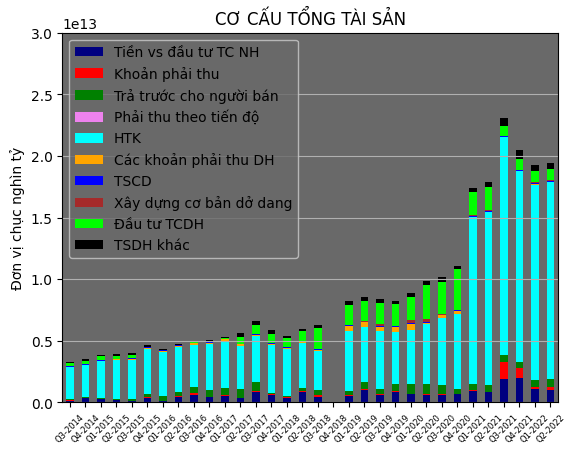

In [ ]:
plt.figure(figsize=(28, 10))
plt.rcdefaults()
# set the axes color glbally for all plots
plt.rcParams.update({'axes.facecolor':'dimgrey'})
data.plot(kind='bar', stacked=True, color=['navy','red','green','violet','aqua','orange','blue','brown','lime','black'])
plt.title('CƠ CẤU TỔNG TÀI SẢN')
plt.ylim(0,30000000000000)
plt.xticks(rotation=45, fontsize=6)
plt.ylabel("Đơn vị chục nghìn tỷ")
plt.grid(axis='y')